Name:Yuheng Chen

Github Username: YuhengCh

USC ID: 9135161440

In [164]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import cross_val_score

## 1. Tree-Based Methods

#### (a) The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric

In [165]:
train  = pd.read_csv('../data/Homework_6_data/aps_failure_training_set.csv', skiprows = 20)
test = pd.read_csv('../data/Homework_6_data/aps_failure_test_set.csv', skiprows = 20)
feautre = train.columns
y_f = train['class'].copy()
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [166]:
len(train[train['class'] == 'pos']), len(train[train['class'] == 'neg'])

(1000, 59000)

#### (b) Data Preparation
####    This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

#### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

ans: there are many types of techinuqes for dealling with missing values.

     1. remove samples that contain a missing value
     2. use a model to replace missing values(mean/median/mode)
     3. predict missing values using other data points
     4. use algorithms that support missing values

I will choose to use softimpute to replace missing values with mean

In [167]:
train['class'].unique()

array(['neg', 'pos'], dtype=object)

In [168]:
## replace class to 0 and 1 from pos/neg
train['class'] = train['class'].replace('neg', 0)
train['class'] = train['class'].replace('pos', 1)
test['class'] = test['class'].replace('neg',  0)
test['class'] = test['class'].replace('pos',  1)

## replace na to np.nan
train = train.replace('na', np.nan)
test = test.replace('na', np.nan)
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,0,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,0,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,0,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [169]:
len(train[train['class'] == 1]), len(train[train['class'] == 0])

(1000, 59000)

In [170]:
from sklearn.impute import SimpleImputer
# use mean to replace missing values
#resource : https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_mean = SimpleImputer(missing_values = np.nan ,strategy="mean")
imp_mean.fit(train)
imp_mean.fit(test)
train = pd.DataFrame(imp_mean.transform(train))
test = pd.DataFrame(imp_mean.transform(test))
train

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,76698.0,0.772065,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.772065,0.000000e+00,439.498794,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.772065,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.772065,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,0.772065,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,0.772065,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,0.772065,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


#### ii. For each of the 170 features, calculate the coefficient of variation CV=s/m, where s is sample standard deviation and m is sample mean

In [171]:
full = pd.concat([train, test] , ignore_index=True)
y = full[0]
full = full.iloc[: , 1:]
full

,1,2,3,4,5,6,7,8,9,10,...,161,162,163,164,165,166,167,168,169,170
0,76698.0,0.772065,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.772065,0.000000e+00,439.498794,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.772065,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.772065,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [172]:
des = full.describe().T
des

,count,mean,std,min,25%,50%,75%,max
1,76000.0,6.115976e+04,2.647366e+05,0.0,860.000000,30813.000000,48840.000000,4.294967e+07
2,76000.0,7.614741e-01,1.580589e+00,0.0,0.772065,0.772065,0.772065,2.040000e+02
3,76000.0,3.565295e+08,7.726380e+08,0.0,20.000000,190.000000,1728.000000,2.130707e+09
4,76000.0,1.133946e+05,3.113852e+07,0.0,42.000000,290.000000,439.498794,8.584298e+09
5,76000.0,6.724006e+00,1.501916e+02,0.0,0.000000,0.000000,0.000000,2.105000e+04
...,...,...,...,...,...,...,...,...
166,76000.0,3.476161e+05,1.697870e+06,0.0,122.000000,43839.000000,174070.000000,1.195801e+08
167,76000.0,1.399465e+05,4.665611e+05,0.0,0.000000,4498.000000,144275.921938,1.926740e+07
168,76000.0,8.426521e+03,4.847680e+04,0.0,0.000000,0.000000,2328.000000,4.570398e+06
169,76000.0,8.426951e-02,4.082620e+00,0.0,0.000000,0.000000,0.000000,4.820000e+02


In [173]:
## find the variation on full dataset
cv = des['std']/des['mean']
cv

1        4.328608
2        2.075696
3        2.167108
4      274.603231
5       22.336620
          ...    
166      4.884326
167      3.333853
168      5.752884
169     48.447180
170     45.426163
Length: 170, dtype: float64

#### iii. Plot a correlation matrix for your features using pandas or any other tool

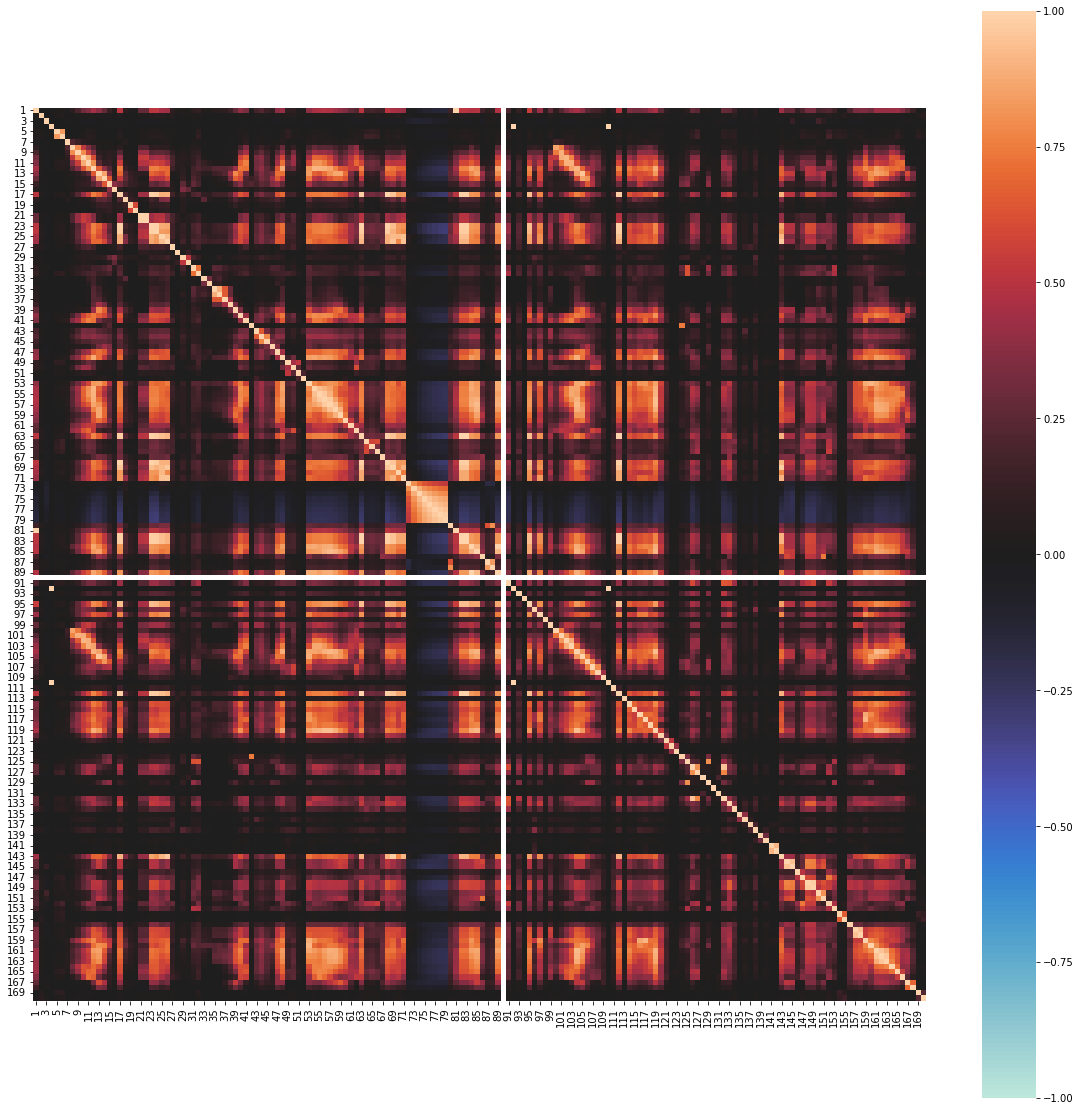

In [174]:
corr = full.corr()
ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

#### iv.Pick √170 features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization

In [175]:
import math
#select largest n values source https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
n = int(math.sqrt(170))
dt_cv = cv.nlargest(n)
index = dt_cv.index
dt_cv

92     275.572370
110    274.893130
4      274.603231
123    190.587197
139    130.467338
137    115.386166
28     111.754129
135     96.489747
7       91.873398
30      85.314981
20      78.860518
52      78.396308
42      77.473641
dtype: float64

In [176]:
dt_cv.index

Int64Index([92, 110, 4, 123, 139, 137, 28, 135, 7, 30, 20, 52, 42], dtype='int64')

In [177]:
full = pd.concat([train, test] , ignore_index=True)
full

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,76698.0,0.772065,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.772065,0.000000e+00,439.498794,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.772065,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,0.772065,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0.0,81852.0,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,0.0,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,0.0,79636.0,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,0.0,110.0,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [178]:
a =full[[0,92, 110, 4, 123, 139, 137, 28, 135, 7, 30, 20, 52, 42]]
a

,0,92,110,4,123,139,137,28,135,7,30,20,52,42
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,40.779932,298.691405,439.498794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0.0,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75996,0.0,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75997,0.0,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75998,0.0,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
features = feautre
feature_selected = features[[0,92, 110, 4, 123, 139, 137, 28, 135, 7, 30, 20, 52, 42]]
a.columns = feature_selected
a

,class,cf_000,co_000,ad_000,cs_009,dj_000,dh_000,as_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,40.779932,298.691405,439.498794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0.0,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75996,0.0,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75997,0.0,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75998,0.0,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


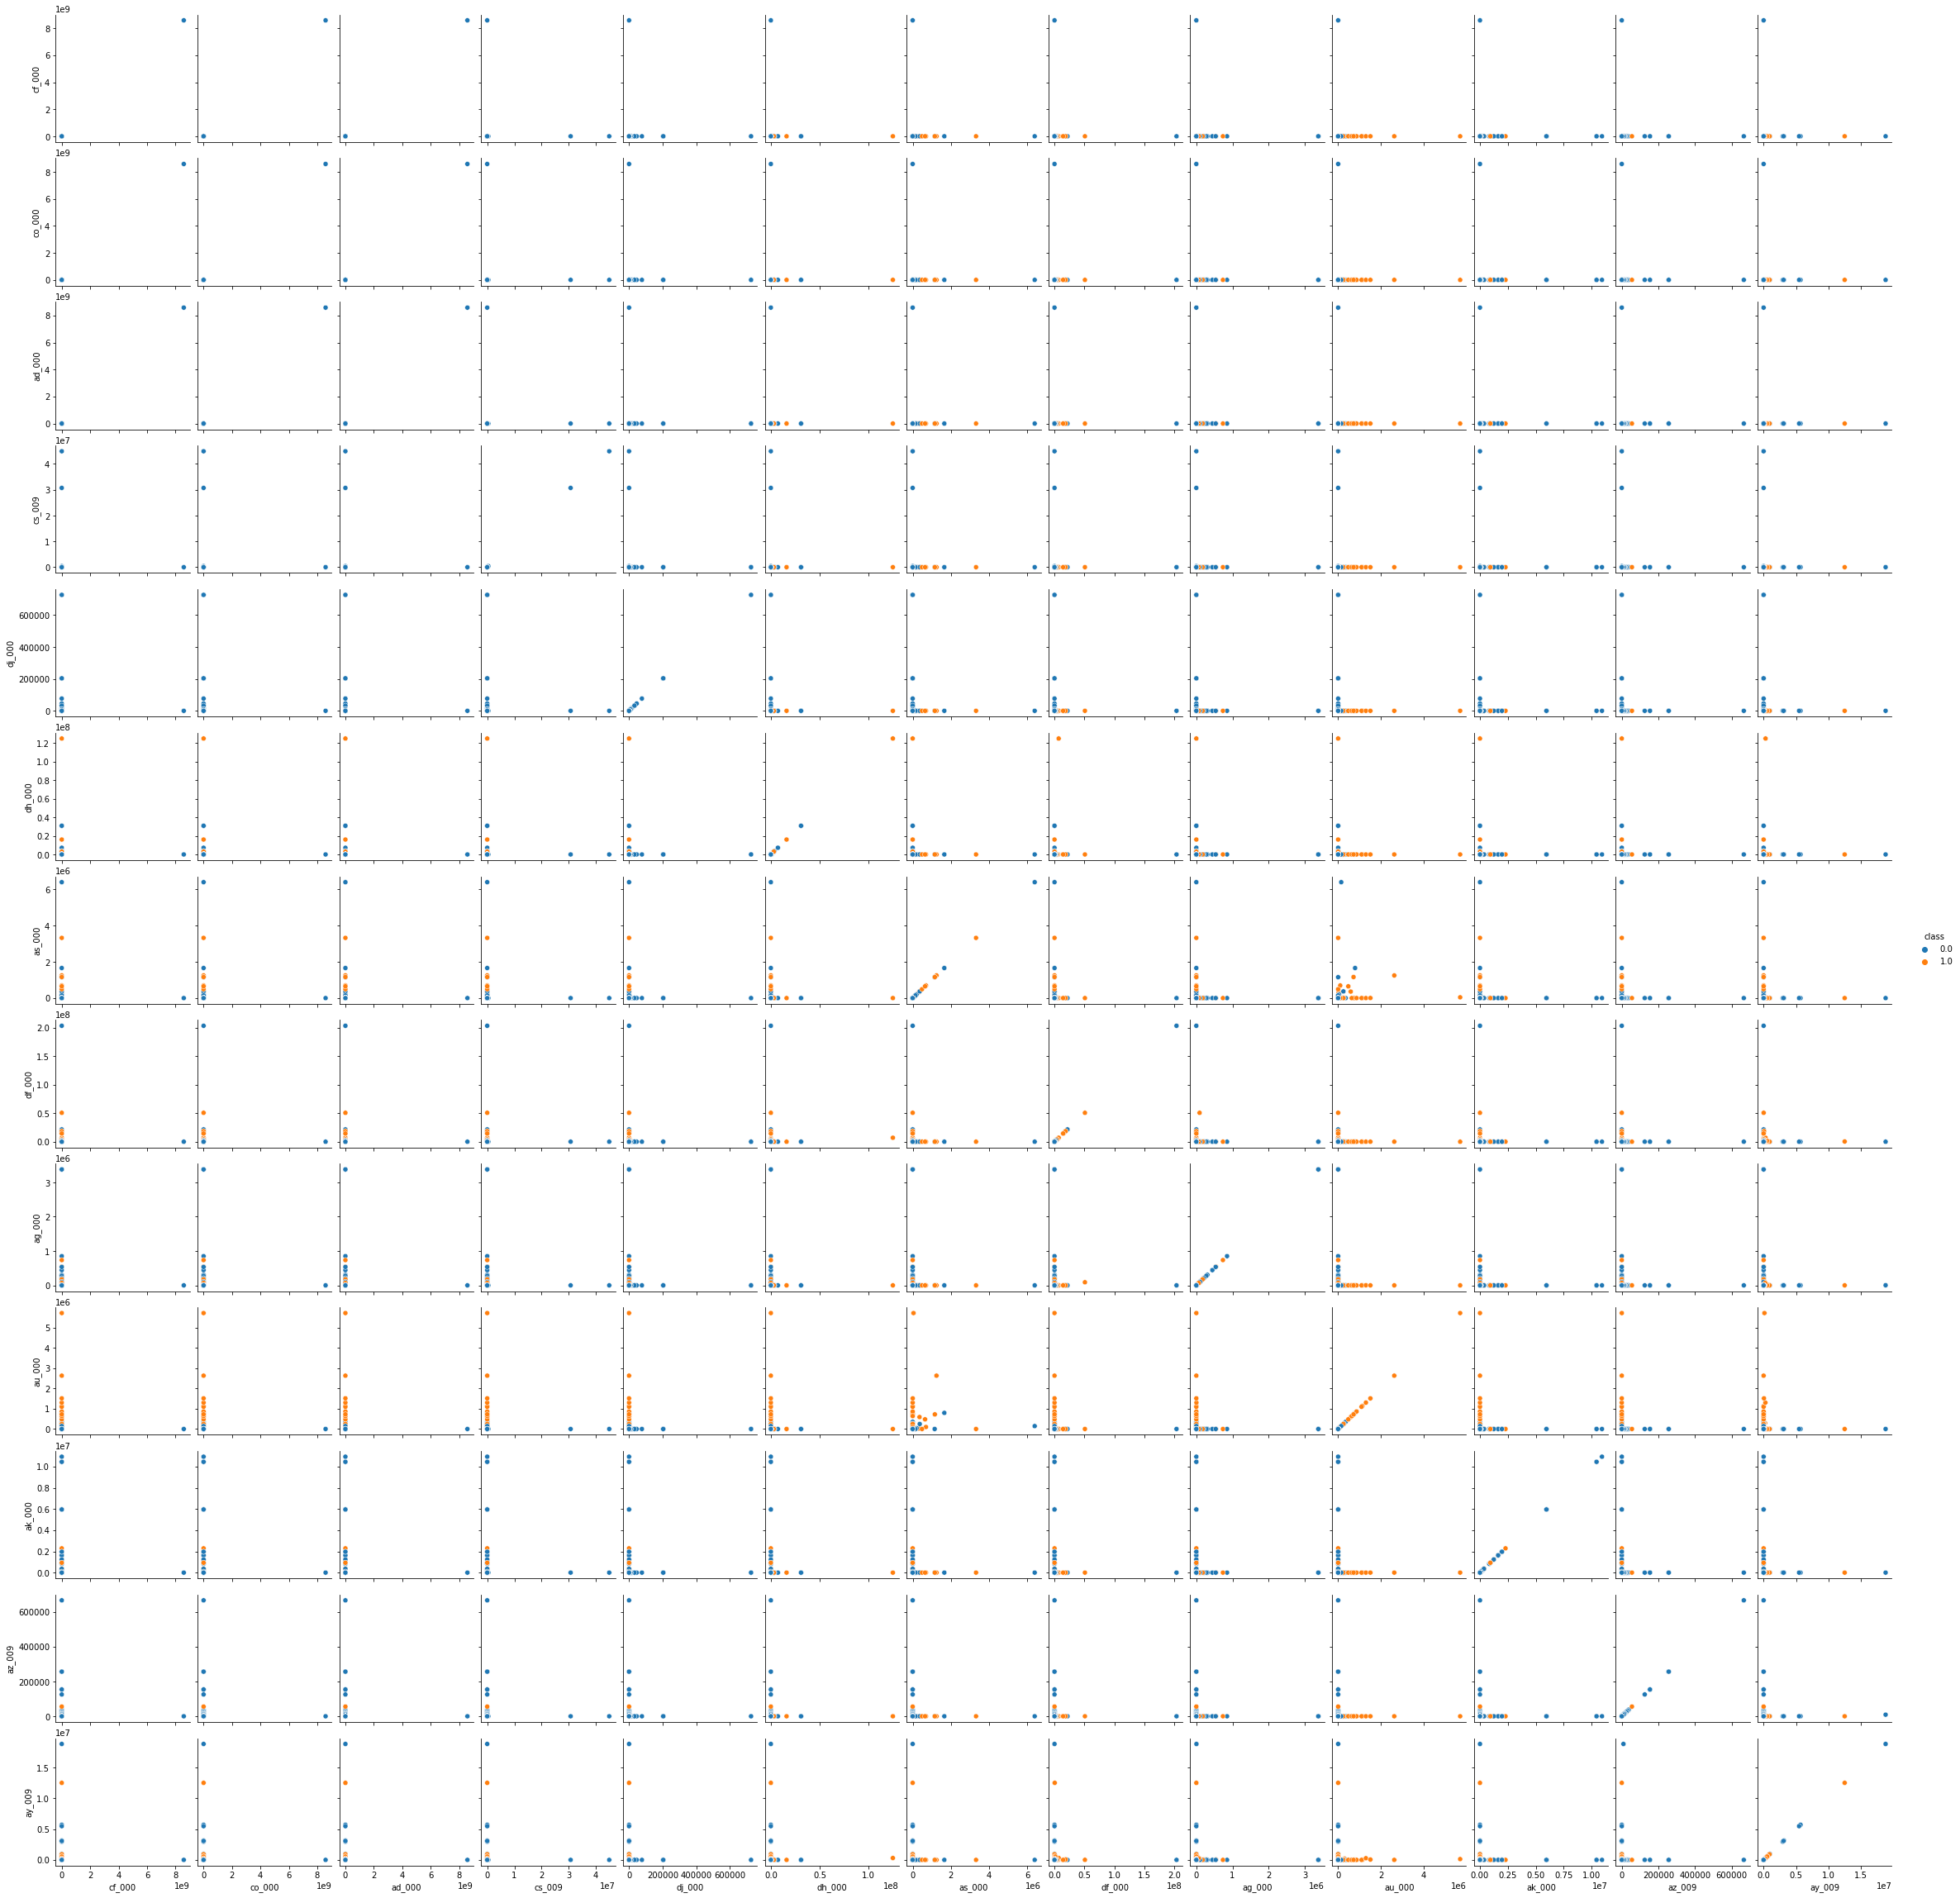

In [135]:
sns.pairplot(a, diag_kind=None, hue = 'class')
plt.show()

In [180]:
y_f

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

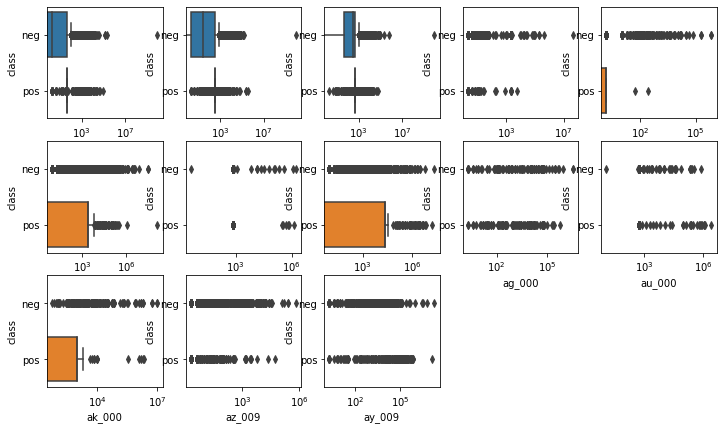

In [184]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,7))
for i,col in enumerate(feature_selected[1:]):
    fig = plt.subplot(3,5,i+1)
    ax = sns.boxplot(a[col],y_f)
    ax.set(xscale="log")
plt.show()



Ans: It is difficult to draw conclusions about significance of those features, just by the scatter plots.

#### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [15]:
y.value_counts()

0.0    74625
1.0     1375
Name: 0, dtype: int64

In [16]:
train[0].value_counts()

0.0    59000
1.0     1000
Name: 0, dtype: int64

In [17]:
test[0].value_counts()

0.0    15625
1.0      375
Name: 0, dtype: int64

Ans: the number of positive is 1375, the number of negative is 74625 for the whole dataset. The positive is just 1.8% of the negative. Thus, the data set is imbalanced.

#### (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [18]:
X_train = train.iloc[:,1:]
y_train = train[0]
X_test = test.iloc[:,1:]
y_test = test[0]

In [19]:
from sklearn.ensemble import RandomForestClassifier
## out of bag(oob_score = True)
rf = RandomForestClassifier(oob_score=True, random_state = 88)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=88)

In [42]:
train_pred = rf.predict(X_train)
train_pred_prob = rf.predict_proba(X_train)
test_pred = rf.predict(X_test)
test_pred_prob = rf.predict_proba(X_test)
train_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

For training data:


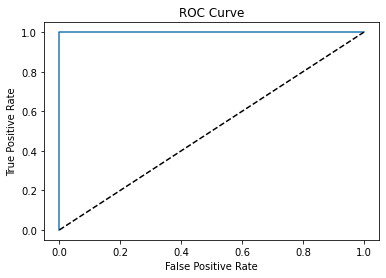

AUC is: 1.0
confusion matrix is
               Predicted False  Predicted True
Actual False            59000               0
Actual True                 0            1000


AUC score is: 1.0
Misclassification rate is: 0.0
F1-Score: 1.0


In [73]:
## training dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_train, train_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob[:,1])
print("For training data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for training data
auc_score = roc_auc_score(y_train, train_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - rf.score(X_train, y_train),3))
# calculate f1-score
print('F1-Score:', f1_score(y_train, train_pred))

For test data:


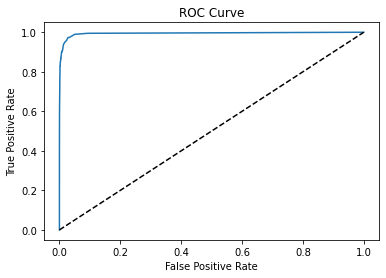

AUC is: 0.9942531413333333
confusion matrix is
               Predicted False  Predicted True
Actual False            15607              18
Actual True               106             269


AUC score is: 0.99425
Misclassification rate is: 0.008
F1-Score: 0.8126888217522658


In [74]:
## test dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_test, test_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob[:,1])
print("For test data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for test data
auc_score = roc_auc_score(y_test, test_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - rf.score(X_test, y_test),3))
# calculate f1-score
print('F1-Score:', f1_score(y_test, test_pred))

In [72]:
print('test error is', round(1 - rf.score(X_test, y_test),3))
print('Out of Bag error is:', 1-rf.oob_score_)

test error is 0.008
Out of Bag error is: 0.006099999999999994


#### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

Ans: We can do subsampling, upsampling, smote, or define class weight in the random forest classifier.

Here,I will use smote in the random forest classifier.

In [20]:
from imblearn.over_sampling import SMOTE
# resample train set and test set
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
rf_balanced = RandomForestClassifier(random_state=88, oob_score=True)
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=88)

In [21]:
train_pred = rf_balanced.predict(X_train)
train_pred_prob = rf_balanced.predict_proba(X_train)
test_pred = rf_balanced.predict(X_test)
test_pred_prob = rf_balanced.predict_proba(X_test)
train_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

For training data:


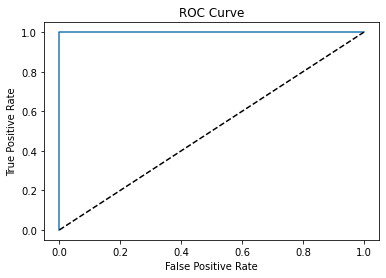

AUC is: 0.9999999999999999
confusion matrix is
               Predicted False  Predicted True
Actual False            59000               0
Actual True                 0           59000


AUC score is: 1.0
Misclassification rate is: 0.0
F1-Score: 1.0


In [22]:
## training dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_train, train_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob[:,1])
print("For training data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for training data
auc_score = roc_auc_score(y_train, train_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - rf_balanced.score(X_train, y_train),3))
# calculate f1-score
print('F1-Score:', f1_score(y_train, train_pred))

For test data:


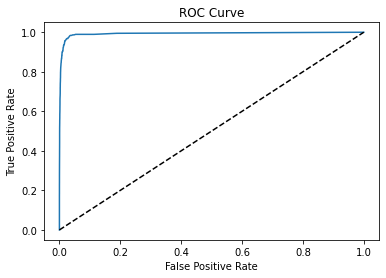

AUC is: 0.9929210026666666
confusion matrix is
               Predicted False  Predicted True
Actual False            15547              78
Actual True                62             313


AUC score is: 0.99292
Misclassification rate is: 0.009
F1-Score: 0.8172323759791124


In [23]:
## test dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_test, test_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob[:,1])
print("For test data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for test data
auc_score = roc_auc_score(y_test, test_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - rf_balanced.score(X_test, y_test),3))
# calculate f1-score
print('F1-Score:', f1_score(y_test, test_pred))

In [24]:
print('test error is', round(1 - rf_balanced.score(X_test, y_test),3))
print('Out of Bag error is:', 1-rf_balanced.oob_score_)

test error is 0.009
Out of Bag error is: 0.0031949152542373183


In [25]:
pd.DataFrame({'imbalanced data': [0.99425, 0.008, 0.8126888217522658, 0.008, 0.006099999999999994], 'balanced data':[0.99292, 0.009, 0.8172323759791124,0.009, 0.0031949152542373183]}, index = ['AUC_score', 'misclassification_rate', 'F1-score', 'test_error', 'out_of_bag_error'])


,imbalanced data,balanced data
AUC_score,0.994250,0.992920
misclassification_rate,0.008000,0.009000
F1-score,0.812689,0.817232
test_error,0.008000,0.009000
out_of_bag_error,0.006100,0.003195


Ans: the result for both training set are the same. For test set, the accuracy of balanced dataset is lower than the imbalanced dataset. This is reasonable because the random forest classifier will basically be classifying to the majority class. However, the Fasle negative of balanced data is lower(62) than the one of imbalanced data(106), and true positives are higher(313) than the one of imbalanced data(269). F1-score of balanced data is also higher than the one of imbalanced data and out of bag error is lower which means balanced data has a positive influence on the model.

#### (e) XGBoost and Model Trees

In [50]:
X_train = train.iloc[:,1:]
y_train = train[0]
X_test = test.iloc[:,1:]
y_test = test[0]

In [51]:
from sklearn.model_selection import KFold
import xgboost as xgb
a = np.arange(-5,5, dtype=float)
range_alpha =  [0.001, 0.01, 0.1, 1, 10, 100]
acc_e = []
f1_e = []

for a in range_alpha:
    xgb_model = xgb.XGBClassifier(objective ='reg:logistic', use_label_encoder =False, reg_alpha = a)
    print('a = ', a)
    kfold = KFold(n_splits=5, shuffle=True)
    kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    kf_cv_f1 = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring = 'f1')
#     if np.mean(kf_cv_scores) > best_mse:
#         best_mse = np.mean(kf_cv_scores)
#         best_a = a
#         r = np.mean(kf_cv_r2)
#     mse.append(np.mean(kf_cv_scores))
    f1_e.append(np.mean(kf_cv_f1))
    acc_e.append(np.mean(kf_cv_scores))

a =  0.001
a =  0.01
a =  0.1
a =  1
a =  10
a =  100


In [52]:
print('f1:', f1_e)

f1: [0.8216334417439312, 0.82145271400342, 0.8178973601487559, 0.8291941582082367, 0.8066634241186941, 0.6565984044650953]


In [61]:
print('validation error:', [1 - x for x in acc_e])

validation error: [0.005316666666666636, 0.005183333333333429, 0.005616666666666603, 0.0053833333333332956, 0.006000000000000005, 0.008950000000000125]


In [59]:
for i in range(len(acc_e)):
    if acc_e[i] == max(acc_e):
        best_a = range_alpha[i]
        index = i
print('best alpha is', best_a)
print('validation error:', round(1-acc_e[index], 4))

best alpha is 0.01
validation error: 0.0052


In [62]:
## select alpha = 0.01
xgb_model = xgb.XGBClassifier(objective ='reg:logistic', use_label_encoder =False, reg_alpha = 0.01)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='reg:logistic',
              predictor='auto', random_state=0, reg_alpha=0.01, ...)

In [63]:
train_pred = xgb_model.predict(X_train)
train_pred_prob = xgb_model.predict_proba(X_train)
test_pred = xgb_model.predict(X_test)
test_pred_prob = xgb_model.predict_proba(X_test)
train_pred_prob

array([[9.9978876e-01, 2.1122393e-04],
       [9.9999249e-01, 7.4875652e-06],
       [9.9999911e-01, 9.2203408e-07],
       ...,
       [9.9998182e-01, 1.8182489e-05],
       [9.9984980e-01, 1.5021279e-04],
       [9.9999946e-01, 5.4038185e-07]], dtype=float32)

For training data:


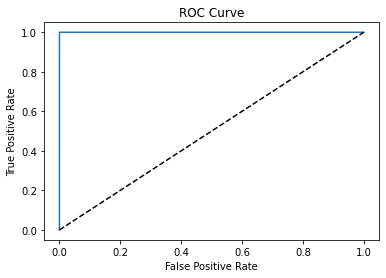

AUC is: 0.9999998983050847
confusion matrix is
               Predicted False  Predicted True
Actual False            59000               0
Actual True                 1             999


AUC score is: 1.0
Misclassification rate is: 0.0
F1-Score: 0.9994997498749374


In [64]:
## training dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_train, train_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob[:,1])
print("For training data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for training data
auc_score = roc_auc_score(y_train, train_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - xgb_model.score(X_train, y_train),3))
# calculate f1-score
print('F1-Score:', f1_score(y_train, train_pred))

For test data:


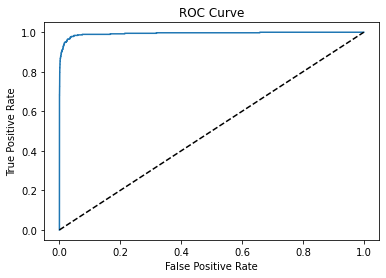

AUC is: 0.993862656
confusion matrix is
               Predicted False  Predicted True
Actual False            15610              15
Actual True                84             291


AUC score is: 0.99386
Misclassification rate is: 0.006
F1-Score: 0.8546255506607929


In [65]:
## test dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_test, test_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob[:,1])
print("For test data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for test data
auc_score = roc_auc_score(y_test, test_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - xgb_model.score(X_test, y_test),3))
# calculate f1-score
print('F1-Score:', f1_score(y_test, test_pred))

In [66]:
print('test error is', round(1 - xgb_model.score(X_test, y_test),3))

test error is 0.006


In [83]:
## compare train error and test error with alpha = 0.01
pd.DataFrame({'validation set': round(1-acc_e[index], 4), 'test set':round(1 - xgb_model.score(X_test, y_test),3)}, index = ['error'])


,validation set,test set
error,0.0052,0.006


Ans:For the imblanaced dataset, the error for training is lower than the one in test set.

#### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [44]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

range_alpha =  [0.001, 0.01, 0.1, 1, 10, 100]
f1 = []
acc = []
for a in range_alpha:
    xgb_model = xgb.XGBClassifier(objective ='reg:logistic', use_label_encoder =False, reg_alpha = a)
    X_train = train.iloc[:,1:]
    y_train = train[0]
    X_test = test.iloc[:,1:]
    y_test = test[0]
    
    sm = SMOTE()
    X_train, y_train = sm.fit_resample(X_train, y_train)
    print('a = ', a)
    cv = StratifiedKFold(n_splits=5)
#     kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    kf_cv_f1 = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring = 'f1')
    kf_cv_acc = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring = 'accuracy')
    f1.append(kf_cv_f1)
    acc.append(kf_cv_acc)


a =  0.001
a =  0.01
a =  0.1
a =  1
a =  10
a =  100


In [73]:
f1 = [x.mean() for x in f1]
acc = [x.mean() for x in acc]
for i in range(len(acc)):
    if acc[i] == max(acc):
        best_alpha_smote = range_alpha[i]
        best_acc_smote = acc[i]
print('best alpha is', best_alpha_smote)
print('best accuracy is', best_acc_smote)

best alpha is 1
best accuracy is 0.9974745762711864


In [75]:
## best alpha is 1
X_train = train.iloc[:,1:]
y_train = train[0]
X_test = test.iloc[:,1:]
y_test = test[0]
    
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
xgb_model_smote = xgb.XGBClassifier(objective ='reg:logistic', use_label_encoder =False, reg_alpha = 1)
xgb_model_smote.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='reg:logistic',
              predictor='auto', random_state=0, reg_alpha=1, ...)

In [77]:
train_pred = xgb_model_smote.predict(X_train)
train_pred_prob = xgb_model_smote.predict_proba(X_train)
test_pred = xgb_model_smote.predict(X_test)
test_pred_prob = xgb_model_smote.predict_proba(X_test)
train_pred_prob

array([[9.9922645e-01, 7.7352644e-04],
       [9.9997222e-01, 2.7757553e-05],
       [9.9999541e-01, 4.5642114e-06],
       ...,
       [2.1815300e-05, 9.9997818e-01],
       [1.0241270e-03, 9.9897587e-01],
       [1.4733076e-03, 9.9852669e-01]], dtype=float32)

For training data:


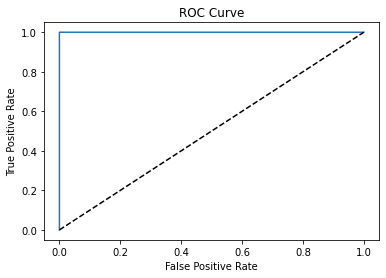

AUC is: 0.9999999215742603
confusion matrix is
               Predicted False  Predicted True
Actual False            59000               0
Actual True                 2           58998


AUC score is: 1.0
Misclassification rate is: 0.0
F1-Score: 0.999983050560179


In [78]:
## training dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_train, train_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_train, train_pred_prob[:,1])
print("For training data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for training data
auc_score = roc_auc_score(y_train, train_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - xgb_model_smote.score(X_train, y_train),3))
# calculate f1-score
print('F1-Score:', f1_score(y_train, train_pred))

For test data:


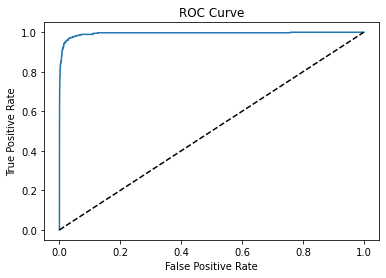

AUC is: 0.9941106346666666
confusion matrix is
               Predicted False  Predicted True
Actual False            15570              55
Actual True                62             313


AUC score is: 0.99411
Misclassification rate is: 0.007
F1-Score: 0.8425302826379542


In [79]:
## test dataset
## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
cm  = confusion_matrix(y_test, test_pred)
cm = pd.DataFrame(cm,columns = ['Predicted False', 'Predicted True'],index=['Actual False', 'Actual True'])

##ROC,AUC
fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob[:,1])
print("For test data:")
# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC is:', auc)

#AUC score for test data
auc_score = roc_auc_score(y_test, test_pred_prob[:,1])
print('confusion matrix is\n', cm)
#auc score
print('\n')
print("AUC score is:", round(auc_score,5))
#misclassification rate
print("Misclassification rate is:", round(1 - xgb_model_smote.score(X_test, y_test),3))
# calculate f1-score
print('F1-Score:', f1_score(y_test, test_pred))

In [80]:
print('test error is', round(1 - xgb_model_smote.score(X_test, y_test),3))

test error is 0.007


In [224]:
## compare train error and test error with alpha = 1
pd.DataFrame({'validation set': [0.0052, round(1-best_acc_smote, 4)], 'test set':[0.006, round(1 - xgb_model_smote.score(X_test, y_test),3)]}, index = ['non_smote_error','smote_error'])


,validation set,test set
non_smote_error,0.0052,0.006
smote_error,0.0025,0.007


Ans: The right way to use the smote with the cross validation is using smote with every iteration of cross validation. Compare to the model that doesn't use smote, The validation error is slower for the smote one.However, the result doesn't change much and the accuracy is very high for both. 

### 2. ISLR 6.6.3

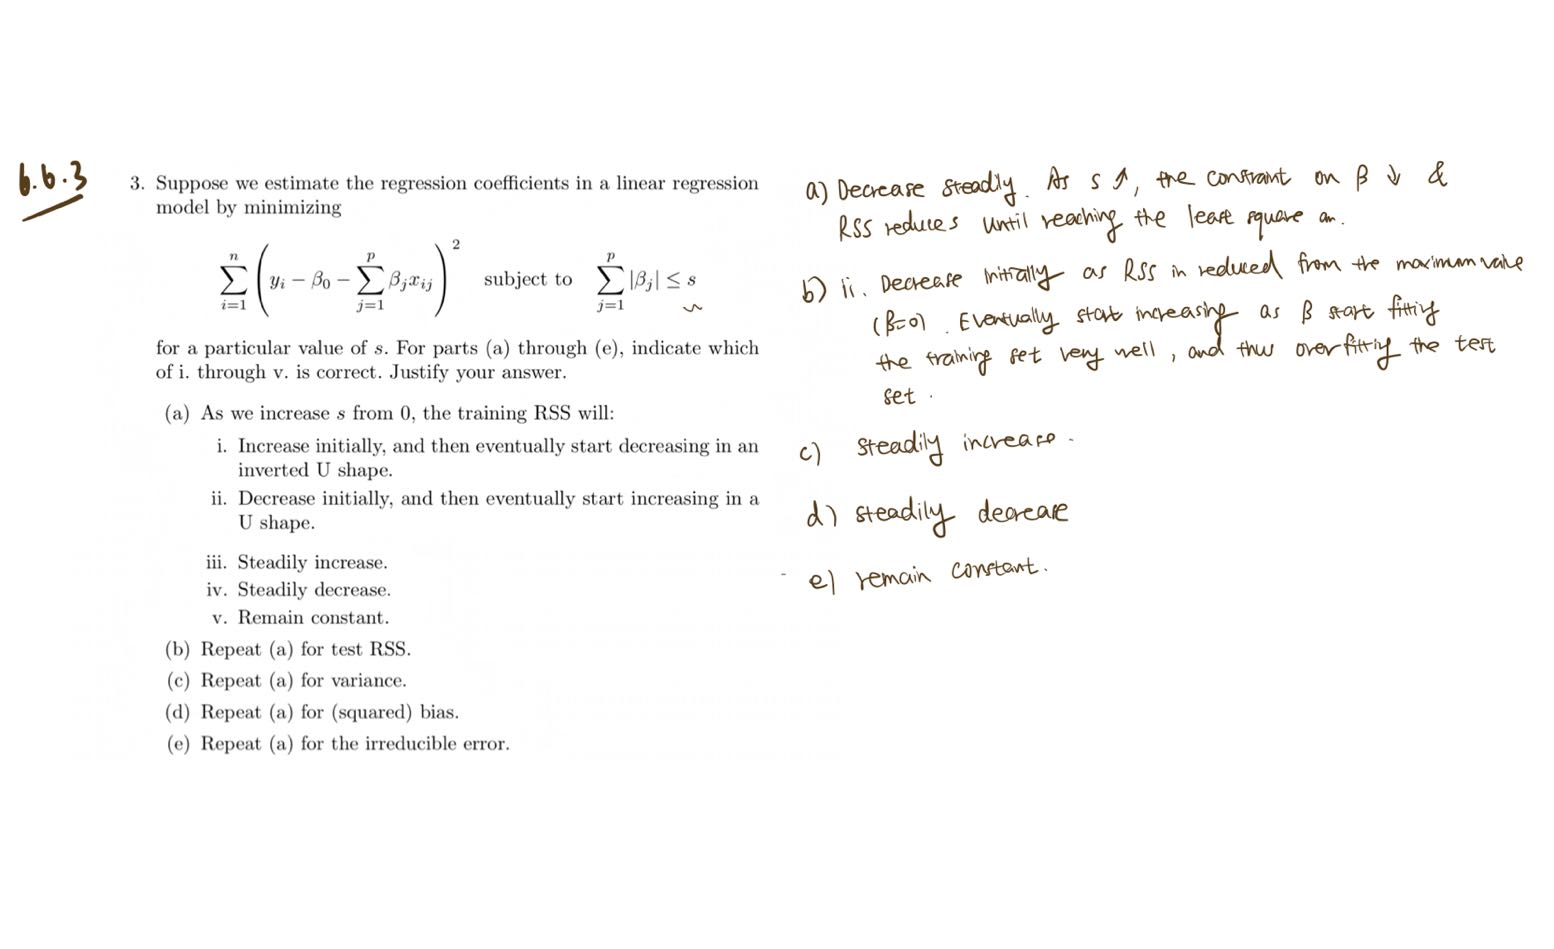

### 3. ISLR 6.6.5

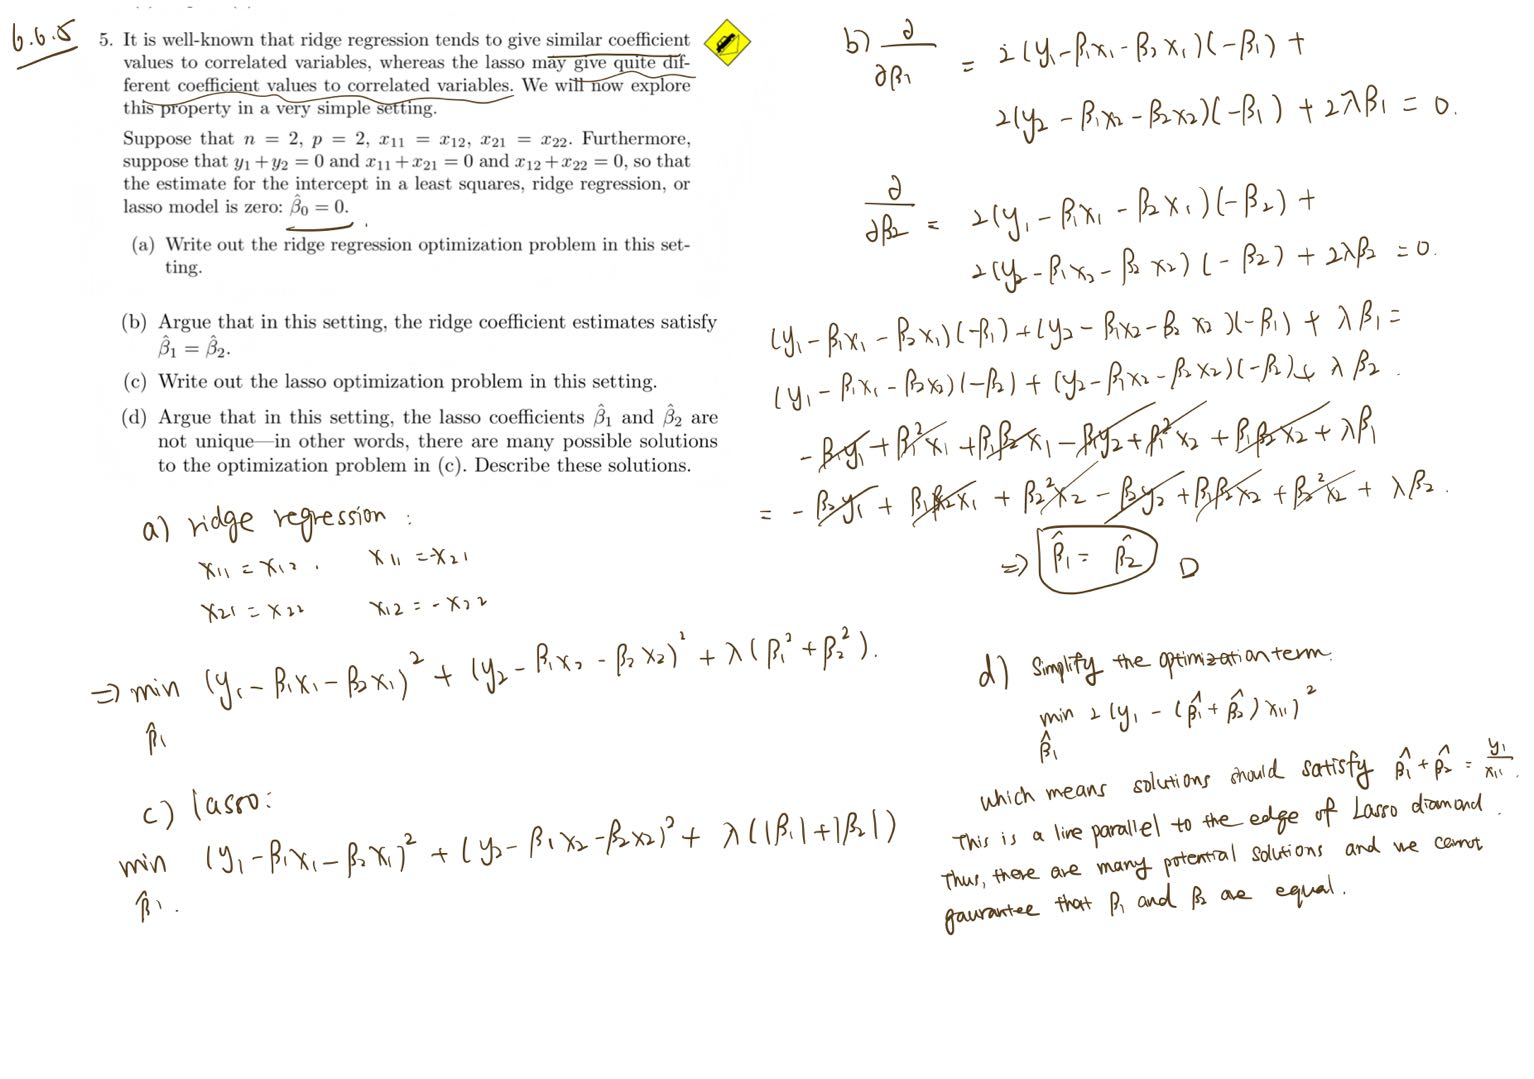

### 4. ISLR 8.4.5

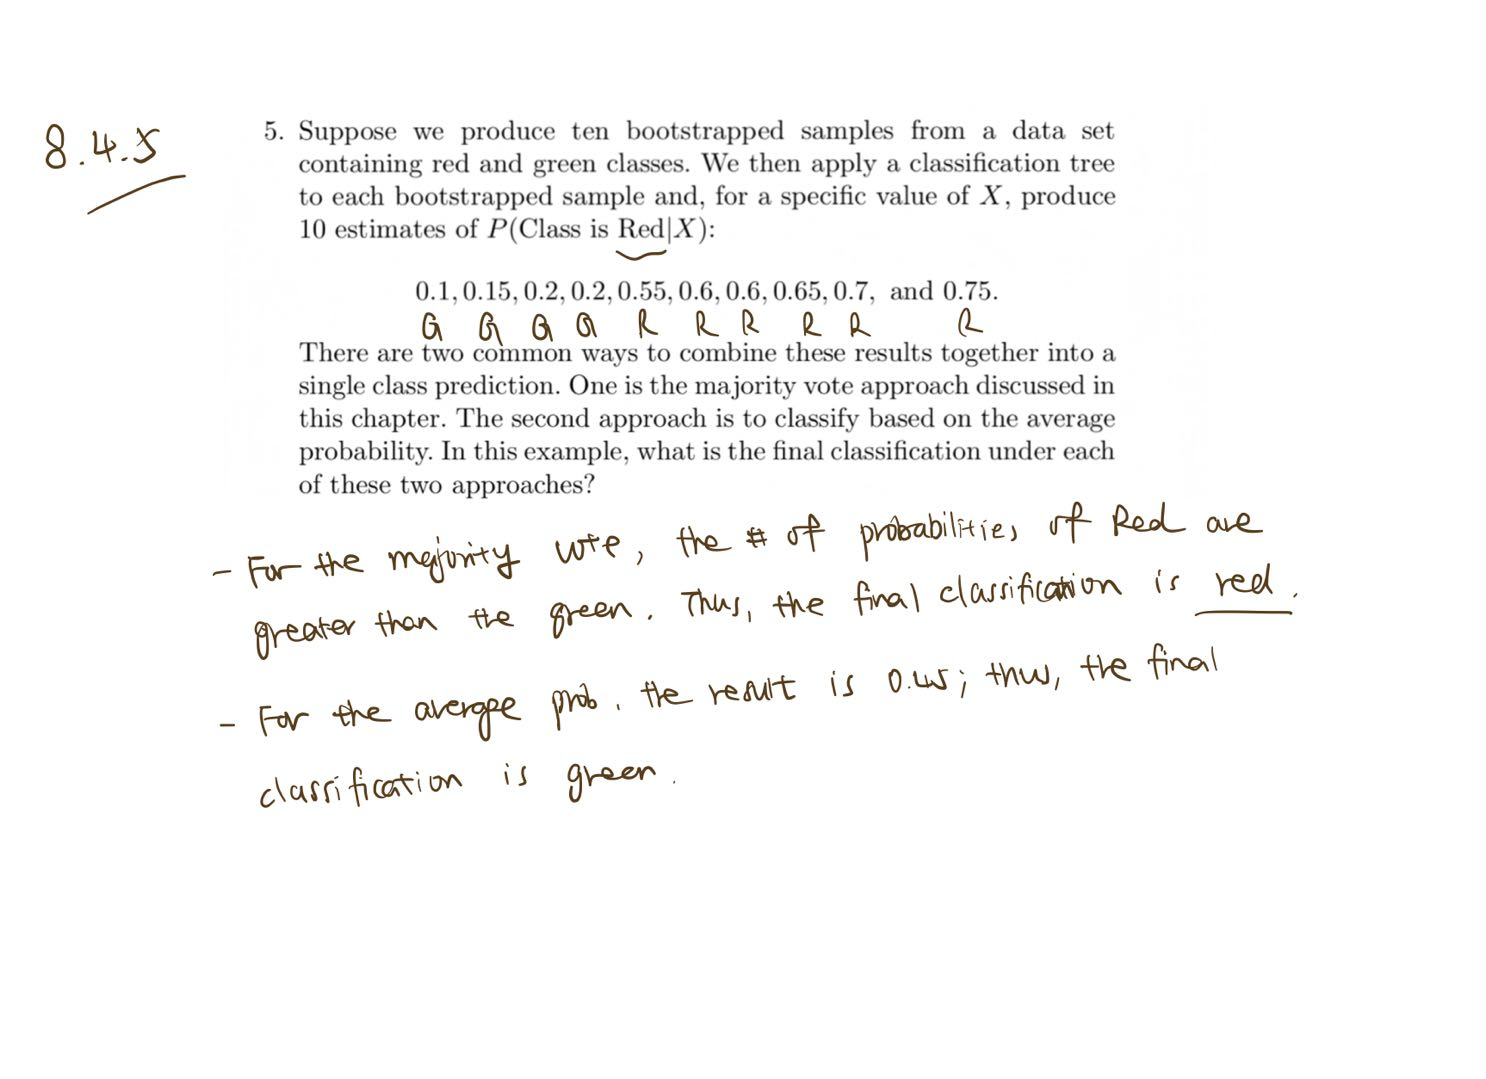

### 5. ISLR 9.7.3

Here we explore the maximal margin classifier on a toy data set.

#### a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

In [189]:
df = pd.DataFrame({'obs.': [1,2,3,4,5,6,7], 'X1':[3,2,4,1,2,4,4], 'X2': [4,2,4,4,1,3,1], 'Y':['Red', 'Red', 'Red', \
                                                                                         'Red', 'Blue', \
                                                                                         'Blue', 'Blue']}, index = [0,1,2,3,4,5,6])
df

,obs.,X1,X2,Y
0,1,3,4,Red
1,2,2,2,Red
2,3,4,4,Red
3,4,1,4,Red
4,5,2,1,Blue
5,6,4,3,Blue
6,7,4,1,Blue


<AxesSubplot:xlabel='X1', ylabel='X2'>

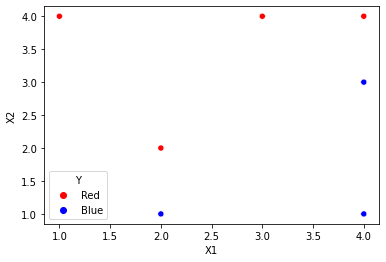

In [197]:
sns.scatterplot(df['X1'], df['X2'], hue = df['Y'], palette=['red', 'blue'])

#### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane(of the form (9.1)).

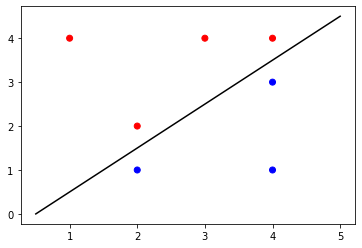

In [205]:
plt.plot([0.5, 5], [0, 4.5],'black')
plt.scatter(df['X1'],  df['X2'], c = df['Y'])
plt.show()

the optimal equation is -0.5+X1=X2, the solid line is the optimal separating hyperplane.

#### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

The classification rules are 

if x1-x2-0.5 <= 0, classify to red.

if x1-x2-0.5 > 0, classify to blue.

#### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

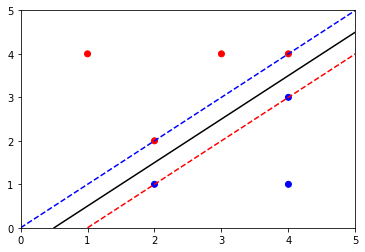

In [204]:
plt.plot([0.5, 5], [0, 4.5], 'k-')
plt.plot([0,5],[0,5], 'b--')
plt.plot([1,5],[0,4], 'r--')
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(df['X1'],  df['X2'], c = df['Y'])
plt.show()

#### (e) Indicate the support vecotrs for the maximal margin classifier.

The support vectors are points(2,1),(2,2),(4,3) and (4,4)

#### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

From the graph we can see that the seventh observation(4,1) is not a support vector. Thus, a slight movement of this observation would not change hte optimal boundary.

#### (g) Sketch a hyperplane that is not the optimal separating hyper- plane, and provide the equation for this hyperplane.

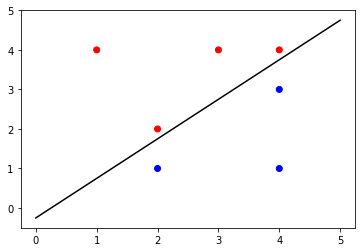

In [220]:
# -0.25 + x1 = x2 
plt.plot([0, 5], [-0.25, 4.75],'black')
plt.scatter(df['X1'],  df['X2'], c = df['Y'])
plt.show()

The equation is -0.25 + x1 = x2. This hyperplane separates the data, but it is not optimal because it is too close to the point.

#### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

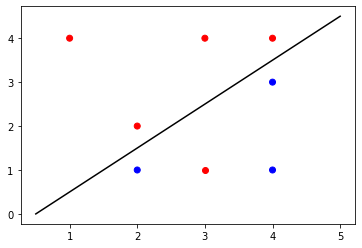

In [223]:
plt.plot([0.5, 5], [0, 4.5],'black')
plt.scatter(df['X1'],  df['X2'], c = df['Y'])
#new point
plt.scatter([3], [1], c = ["red"])
plt.show()

I add a red point(3,1) on the side of blue part. The two classes are no longer separable by a hyperplane.